# 갭마인더 데이터 집합 불러오기

In [1]:
import pandas as pd

df = pd.read_csv('../data/gapminder.tsv', sep = '\t') 
# ../는 상위폴더 디렉토리를 의미한다

# 불러온 데이터 집합 살펴보기

In [2]:
print(df.head(), '\n')  # data head 출력하기
print(df.tail(), '\n') # data tail 출력하기
print(type(df), '\n') # data 자료형 출력하기
print(df.shape, '\n') # data 형태 출력하기
print(df.columns, '\n') # data 컬럼 이름 출력하기
print(df.dtypes, '\n') # data 컬럼 유형 출력하기
print(df.info(), '\n') # data 설명 출력하기

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106 

       country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298 

<class 'pandas.core.frame.DataFrame'> 

(1704, 6) 

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object') 

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    

|   판다스 자료형   |   파이썬 자료형   |   설명   |
|---|---|---|
| `object` | `string` | 문자열 |
| `int64` | `int` | 정수 |
| `float64` | `float` | 실수 |
| `datetime64` | `datetime` | 시간 |

# 열 단위로 데이터 추출하기

In [3]:
country_df=df['country'] # 데이터프레임에서 열 이름이 country인 열 추출

print(type(country_df), '\n') # column 한개만 추출했으므로 series로 출력된다
print(country_df.head(), '\n')
print(country_df.tail())

<class 'pandas.core.series.Series'> 

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object 

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [4]:
subset = df[['country', 'continent', 'year']]
# test =df['country', 'continent', 'year'] >> ERROR

bset = df[['country', 'continent', 'year']]
# test =df['country', 'continent', 'year'] >> ERROR

print(type(subset), '\n') # column 여러개를 추출했으므로 DataFrame으로 출력된다
print(subset.head(), '\n')
print(subset.tail())

<class 'pandas.core.frame.DataFrame'> 

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972 

       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


# 행단위로 데이터 추출하기

| 속성 | 설명 |
|---|---|
| `loc` | 인덱스를 기준으로 행 데이터 추출 |
| `iloc` | 행 번호를 기준으로 행 데이터 추출 |

# loc 속성으로 행 단위 데이터 추출하기

In [5]:
print(df.head(1))

country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314


In [6]:
print(df.loc[0])
# print(df.loc[-1]) >> index에 없는 값을 넣으면 에러가 난다

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object


# tail과 loc는 조금 달라요!
- 부제 : 데이터의 마지막 행 호출하기
- 참고 : 둘이 반환하는 데이터유형도 다르다
    - loc : series 반환
    - tail : dataframe 반환

In [7]:
num_rows = df.shape[0]
last_row_idx = num_rows-1
print(df.loc[last_row_idx])
print(type(df.loc[last_row_idx]))

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
<class 'pandas.core.series.Series'>


In [8]:
print(df.tail(1))
print(type(df.tail(1)))

country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
<class 'pandas.core.frame.DataFrame'>


# iloc 속성으로 행 단위 데이터 추출하기

In [9]:
print(df.iloc[-1], '\n')

print(df.iloc[[0,99,999]])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object 

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


# 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기
- `df.loc[[행], [열]]` >> index이름으로 조회
- `df.iloc[[행], [열]]` >> index속성으로 조회

In [10]:
subset = df.loc[:, ['year', 'pop']]
print(subset.head(), '\n')
print(subset.shape, '\n')

subset2 = df[['year', 'pop']]
print(subset2.head(), '\n')
print(subset2.shape, '\n')

# subset3 = df.loc[:, [1, 2]] 
# index의 이름으로 조회하기 때문에 에러가 나는 것을 확인할 수 있다

year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460 

(1704, 2) 

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460 

(1704, 2) 



In [11]:
subset = df.iloc[:, [2,4,-1]]
print(subset.head(), '\n')
print(subset.shape, '\n')

# subset2 = df.iloc[:, ['year', 'pop', 'gdpPercap']]
# index의 속성으로 조회하기 때문에 에러가 나는 것을 확인할 수 있다

year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106 

(1704, 3) 



# iloc 속성과 range 메서드로 원하는 데이터 추출하기

In [12]:
range_unchanged = range(5)
small_range = list(range(5))

print(range_unchanged)
print(type(range_unchanged), '\n') # Generator 반환
print(small_range)
print(type(small_range), '\n') # list 반환 >> iloc을 위해서는 list로 변환해줘야함

subset = df.iloc[:, small_range]
print(subset.head())

range(0, 5)
<class 'range'> 

[0, 1, 2, 3, 4]
<class 'list'> 

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


# 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기

In [13]:
subset = df.iloc[:, list(range(3))]
print(subset.head())

country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [14]:
subset = df.iloc[:, :3]
print(subset.head())

country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [15]:
small_range = list(range(0,6,2))
print(small_range, '\n')

subset = df.iloc[:, small_range]
print(subset.head())

[0, 2, 4] 

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [16]:
subset = df.iloc[:, 0:6:2]
print(subset.head())

country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


# loc, iloc 자유자재로 사용하기

In [17]:
print(df.iloc[[0,99,999],[0,3,5]])

country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [18]:
print(df.loc[[0,99,999],['country','lifeExp','gdpPercap']])

country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [19]:
print(df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']])

country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


# 그룹화한 데이터의 평균 구하기
- groupby

In [20]:
print(df.groupby('year')['lifeExp'].mean(), '\n')
print(df.groupby('year')['lifeExp'].min(), '\n')
print(df.groupby('year')['lifeExp'].max(), '\n')
print(df.groupby('year')['lifeExp'].median(), '\n')

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64 

year
1952    28.801
1957    30.332
1962    31.997
1967    34.020
1972    35.400
1977    31.220
1982    38.445
1987    39.906
1992    23.599
1997    36.087
2002    39.193
2007    39.613
Name: lifeExp, dtype: float64 

year
1952    72.670
1957    73.470
1962    73.680
1967    74.160
1972    74.720
1977    76.110
1982    77.110
1987    78.670
1992    79.360
1997    80.690
2002    82.000
2007    82.603
Name: lifeExp, dtype: float64 

year
1952    45.1355
1957    48.3605
1962    50.8810
1967    53.8250
1972    56.5300
1977    59.6720
1982    62.4415
1987    65.8340
1992    67.7030
1997    69.3940
2002    70.8255
2007    71.9355
Name: lifeExp, dtype: float64 



In [21]:
# 연도별로 그룹화한 열들을 모은 데이터프레임
grouped_year_df = df.groupby('year')
print(type(grouped_year_df))
print(grouped_year_df)
print('\n')

# 데이터프레임 중 lifeExp
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
print(type(grouped_year_df_lifeExp))
print(grouped_year_df_lifeExp)
print('\n')

# mean 메서드를 이용한 평균 도출
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean() 
print(mean_lifeExp_by_year)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<class 'pandas.core.groupby.generic.SeriesGroupBy'>


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [22]:
# lifeExp, gdpPercap 열의 평균값을 연도, 지역별로 그룹화하여 한 번에 계산하기
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()

print(multi_group_var, '\n')
print(type(multi_group_var))

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70

# 그룹화한 데이터의 개수 세어보기

In [23]:
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


# 그래프 만들기

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


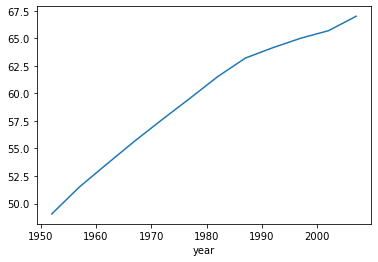

In [26]:
global_yearly_life_expectancy.plot()